## -------------------------------------- The Sparks Foundation ------------------------------------------

# -------------- Data Science and Business Analytics - Aug'2021--------------

### -------------------------------------- Task 1 : Prediction using Supervised ML -------------------------------------------

### ----------------------------------------------- Author : Nattasha Banerjee -----------------------------------------------------

In [1]:
#Importing Libraries
import pandas as pd  

import numpy as np 

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

import seaborn as sb

print("All the required libraries are imported sucessfully")

All the required libraries are imported sucessfully


In [2]:
#Import Dataset
df=pd.read_csv("data.csv")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.isnull == True

False

##### There exist no null values, Hence we can visualize the data

### Data visualization ( using bar chart )

Text(0.5, 1.0, 'Hours vs Percentage')

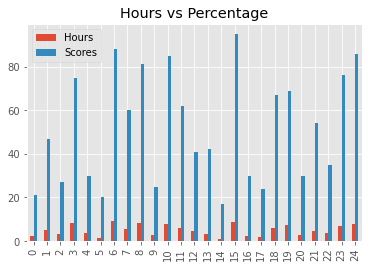

In [7]:
plt.style.use('ggplot')

df.plot(kind='bar')

plt.title('Hours vs Percentage')

### Data visualization ( using scatter plot )

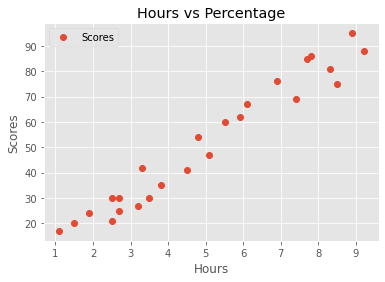

In [8]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours')  
plt.ylabel('Scores')  
plt.show()

*From the scatter plot, positive correlation between hours and scores can be observed*
* Which means the variables are strongly related to each other
* There exist no outlyers

In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Training the model

In [10]:
#Splitting the dataset into attributes and labels
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [11]:
#Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Training the algorithm

In [12]:
from sklearn.linear_model import LinearRegression  

regressor = LinearRegression() 

regressor.fit(X_train, y_train)   
  
print("Training completed")

Training completed


## Plotting regression line 

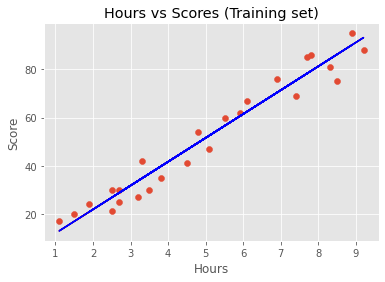

In [13]:
line = regressor.coef_*X+regressor.intercept_  

plt.scatter(X, y)  

plt.plot(X, line);  

plt.plot(X_train, regressor.predict(X_train), color = 'blue')

plt.title('Hours vs Scores (Training set)')

plt.xlabel('Hours')

plt.ylabel('Score')

plt.show()

## Predicting the scores

In [14]:
print(X_test)  

y_pred = regressor.predict(X_test)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


## Comparing actual vs predicted model

In [15]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})    
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


## Actual vs Predicted model ( using bar chart )

Text(0.5, 1.0, 'Actual vs Predicted')

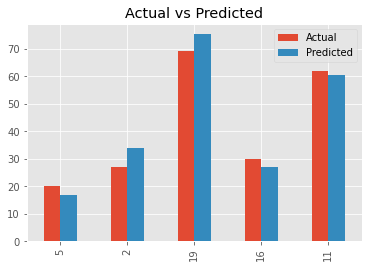

In [16]:
plt.style.use('ggplot')

df.plot(kind='bar')

plt.title('Actual vs Predicted')

## Actual vs Predicted model ( using scatter plot )

Text(0.5, 1.0, 'Actual vs Predicted')

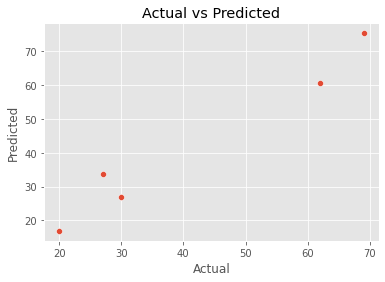

In [17]:
sb.scatterplot(x='Actual',y='Predicted',data=df)

plt.title('Actual vs Predicted')

In [18]:
#Predicting the result
prediction=regressor.predict([[9.6]])
prediction

array([97.16046226])

## Testing the model

##### Calculating predicted score when a student studies for 9.25 hrs/ day

In [19]:
hours = [[9.25]]  

own_pred = regressor.predict(hours) 

print("Number of hours = {}".format(hours)) 

print("Prediction Score = {}".format(own_pred[0]))

Number of hours = [[9.25]]
Prediction Score = 93.69173248737538


**The predicted score for a student who studies for 9.25 hrs/day is 93.69**

## Checking Mean Absolute Error

In [20]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


## Checking accuracy of model

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9454906892105356

# Thank you 
### Submitted by Nattasha Banerjee